In [4]:
!pip install simpy


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
import numpy as np


In [6]:
# Load the dataset for 5G from a CSV file (replace "5g_dataset.csv" with your 5G dataset file name)
data_5g = pd.read_csv(r"/Users/apple/Downloads/end_to_end_delay_5g(1).csv")
data_5g.head()

,Packet ID,Source,Destination,End-to-End Delay,Priority,Traffic Class
0,1,197,959,10.0,4,Video Streaming
1,2,768,301,10.0,3,Web Browsing
2,3,90,715,10.1,3,Video Streaming
3,4,536,554,10.1,2,Video Streaming
4,5,920,904,10.1,3,VoIP


In [7]:
data_6g = pd.read_csv(r"/Users/apple/Downloads/end_to_end_delay_6g(1).csv")
data_6g.head()

,Packet ID,Source,Destination,End-to-End Delay,Priority,Traffic Class
0,1,717,677,8.416667,5,VoIP
1,2,708,957,8.666667,3,VoIP
2,3,179,174,8.750000,5,Video Streaming
3,4,124,999,8.916667,4,VoIP
4,5,343,402,9.000000,3,Web Browsing


In [8]:
data_5g =  data_5g.dropna()
data_6g = data_6g.dropna()

In [9]:
# Step 2: Drop the last column
data_5g = data_5g.iloc[:, :-1]  # Drop last column
data_6g = data_6g.iloc[:, :-1]  # Drop last column

In [10]:
data_5g.head()

,Packet ID,Source,Destination,End-to-End Delay,Priority
0,1,197,959,10.0,4
1,2,768,301,10.0,3
2,3,90,715,10.1,3
3,4,536,554,10.1,2
4,5,920,904,10.1,3


In [11]:
data_6g.head()

,Packet ID,Source,Destination,End-to-End Delay,Priority
0,1,717,677,8.416667,5
1,2,708,957,8.666667,3
2,3,179,174,8.750000,5
3,4,124,999,8.916667,4
4,5,343,402,9.000000,3


In [12]:
# Step 3: Split the datasets
X_5g = data_5g.drop('End-to-End Delay', axis=1)
y_5g = data_5g['End-to-End Delay']
X_6g = data_6g.drop('End-to-End Delay', axis=1)
y_6g = data_6g['End-to-End Delay']


In [13]:
# Step 4: Train and evaluate the algorithms
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Regression': SVR(),
    'Gradient Boosting': GradientBoostingRegressor()}
results = {}

In [14]:
for name, model in models.items():
    # Train the model on 5G dataset
    X_train_5g, X_test_5g, y_train_5g, y_test_5g = train_test_split(X_5g, y_5g, test_size=0.2)
    model.fit(X_train_5g, y_train_5g)
    y_pred_5g = model.predict(X_test_5g)
    # Evaluate the model on 6G dataset
    X_train_6g, X_test_6g, y_train_6g, y_test_6g = train_test_split(X_6g, y_6g, test_size=0.2)
    model.fit(X_train_6g, y_train_6g)
    y_pred_6g = model.predict(X_test_6g)

In [15]:
 # Store the results
results[name] = {'5G': (y_test_5g, y_pred_5g), '6G': (y_test_6g, y_pred_6g)}

In [16]:
# Step 5: Compare the results
from sklearn.metrics import mean_squared_error

def print_evaluation_metrics(actual, predicted):
    mse = mean_squared_error(actual, predicted)
    print(f"Mean Squared Error: {mse}")
for name, result in results.items():
    print(f"Algorithm: {name}")
    print("Results for 5G:")
    # Print evaluation metrics for 5G dataset
    print_evaluation_metrics(*result['5G'])
    print("Results for 6G:")
    # Print evaluation metrics for 6G dataset
    print_evaluation_metrics(*result['6G'])
    print()

Algorithm: Gradient Boosting
Results for 5G:
Mean Squared Error: 631.5597714209761
Results for 6G:
Mean Squared Error: 461.4225584837721



In [17]:
# Plotting the line graph for each algorithm
plt.plot(test_data, knn_predictions, label='KNN')
plt.plot(test_data, svm_predictions, label='SVM')
plt.plot(test_data, logistic_regression_predictions, label='Logistic Regression')
plt.plot(test_data, dnn_predictions, label='DNN')
plt.plot(test_data, random_forest_predictions, label='Random Forest')


NameError: name 'test_data' is not defined

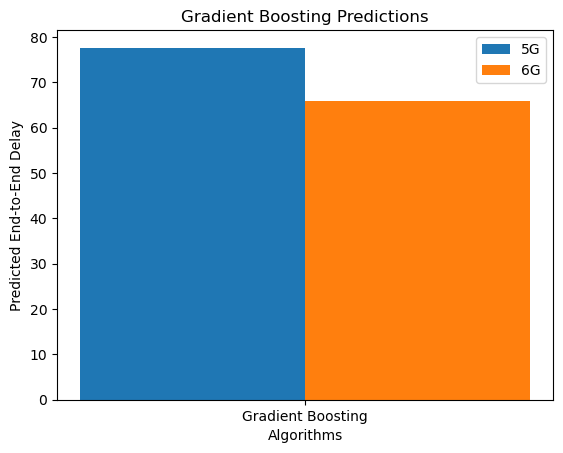

In [18]:
# Step 6: Generate bar graphs
x = np.arange(len(results))
width = 0.35

for name, result in results.items():
    fig, ax = plt.subplots()
    ax.bar(x - width/2, result['5G'][1], width, label='5G')
    ax.bar(x + width/2, result['6G'][1], width, label='6G')
    ax.set_xlabel('Algorithms')
    ax.set_ylabel('Predicted End-to-End Delay')
    ax.set_title(f"{name} Predictions")
    ax.set_xticks(x)
    ax.set_xticklabels(results.keys())
    ax.legend()
    plt.show()

Algorithm: Gradient Boosting
Results for 5G:
Mean Squared Error: 631.5597714209761
Results for 6G:
Mean Squared Error: 461.4225584837721



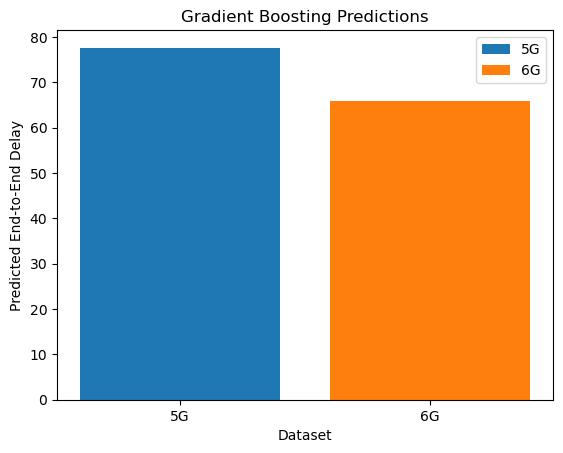

In [19]:

# Step 5: Compare the results
for name, result in results.items():
    print(f"Algorithm: {name}")
    print("Results for 5G:")
    # Print evaluation metrics for 5G dataset
    print_evaluation_metrics(*result['5G'])
    print("Results for 6G:")
    # Print evaluation metrics for 6G dataset
    print_evaluation_metrics(*result['6G'])
    print()
    
    # Step 6: Generate bar graph for each algorithm
    fig, ax = plt.subplots()
    ax.bar('5G', result['5G'][1], label='5G')
    ax.bar('6G', result['6G'][1], label='6G')
    ax.set_xlabel('Dataset')
    ax.set_ylabel('Predicted End-to-End Delay')
    ax.set_title(f"{name} Predictions")
    ax.legend()
    plt.show()


Mean Squared Error (5G): 668.719163802412
Mean Squared Error (6G): 564.2338151620938
6G has a lower mean squared error, indicating better performance.


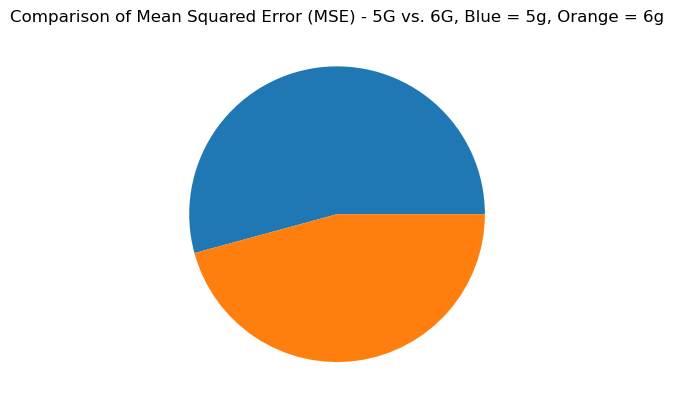

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


# Prepare the data for training the model
X_5g = data_5g.drop('End-to-End Delay', axis=1).values
y_5g = data_5g['End-to-End Delay'].values

X_6g = data_6g.drop('End-to-End Delay', axis=1).values
y_6g = data_6g['End-to-End Delay'].values

# Train the model on the 5G dataset
model_5g = LinearRegression()
model_5g.fit(X_5g, y_5g)

# Evaluate the model on the 6G dataset
y_6g_pred = model_5g.predict(X_6g)
mse_6g = mean_squared_error(y_6g, y_6g_pred)

# Calculate the mean squared error for 5G
y_5g_pred = model_5g.predict(X_5g)
mse_5g = mean_squared_error(y_5g, y_5g_pred)

# Print the mean squared error for 5G and 6G
print(f"Mean Squared Error (5G): {mse_5g}")
print(f"Mean Squared Error (6G): {mse_6g}")

# Compare the performance of 5G and 6G
if mse_5g < mse_6g:
    print("5G has a lower mean squared error, indicating better performance.")
elif mse_5g > mse_6g:
    print("6G has a lower mean squared error, indicating better performance.")
else:
    print("5G and 6G have the same mean squared error.")
# Calculate the mean squared error for 5G and 6G
mse_values = [mse_5g, mse_6g]


# Plot the bar graph
plt.pie(mse_values)


plt.title('Comparison of Mean Squared Error (MSE) - 5G vs. 6G, Blue = 5g, Orange = 6g')
plt.show()    


